In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def show(img, title="", cmap=None):
    plt.figure(figsize=(5,5))
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

Pixel le plus lumineux : 255
Position : (array([2071, 2082, 2093, 2103, 2189, 2196]), array([1845, 1838, 1830, 1822, 1686, 1652]))


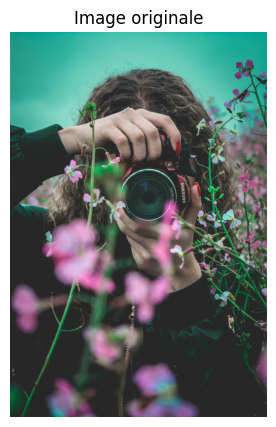

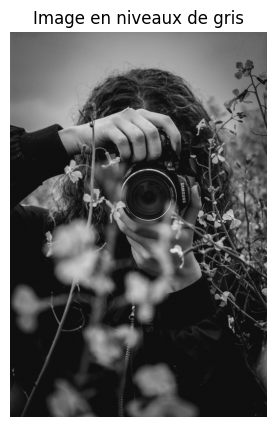

In [ ]:
img = cv2.imread("images/photo-1495745966610-2a67f2297e5e.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show(img, "Image originale")
show(gray, "Image en niveaux de gris", cmap="gray")

max_pixel = np.max(gray)
pos = np.where(gray == max_pixel)

print("Pixel le plus lumineux :", max_pixel)
print("Position :", pos)

In [ ]:
img = cv2.imread("images/fireworks.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

red1 = cv2.inRange(hsv, (0,120,70), (10,255,255))
red2 = cv2.inRange(hsv, (170,120,70), (180,255,255))
red = red1 + red2

orange = cv2.inRange(hsv, (11,100,100), (25,255,255))
green = cv2.inRange(hsv, (35,100,100), (85,255,255))

counts = {
    "Rouge": np.sum(red),
    "Orange": np.sum(orange),
    "Vert": np.sum(green)
}

print("Lumière détectée :", max(counts, key=counts.get))

Lumière détectée : Rouge


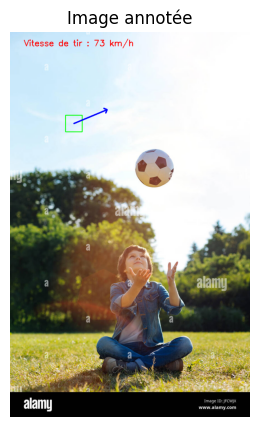

In [ ]:
img = cv2.imread("images/BALL.jpg")

cv2.rectangle(img, (200,300), (260,360), (0,255,0), 2)
cv2.arrowedLine(img, (230,330), (350,280), (255,0,0), 3)
cv2.putText(img, "Vitesse de tir : 73 km/h",
            (50,50), cv2.FONT_HERSHEY_SIMPLEX,
            1, (0,0,255), 2)

show(img, "Image annotée")

Angle estimé : -20.000002


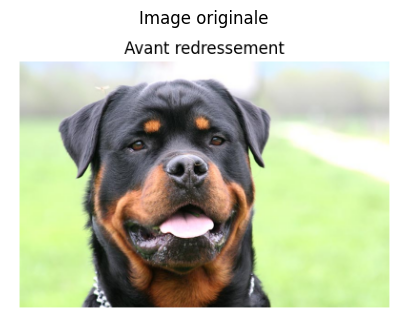

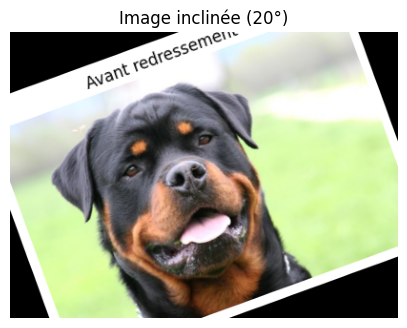

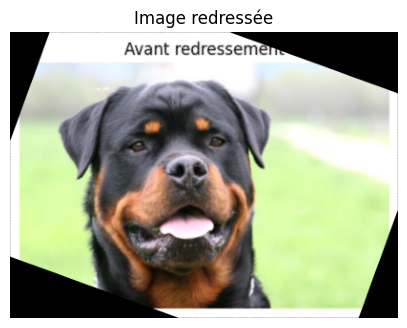

In [ ]:
# Charger l'image
img = cv2.imread("images/dog.jpg")

if img is None:
    raise FileNotFoundError("Image non trouvée. Vérifie le chemin images/dog.jpg")

h, w = img.shape[:2]


angle_tilt = 20  # inclinaison volontaire
M_tilt = cv2.getRotationMatrix2D((w//2, h//2), angle_tilt, 1)
tilted = cv2.warpAffine(img, M_tilt, (w, h))

show(img, "Image originale")
show(tilted, "Image inclinée (20°)")


gray = cv2.cvtColor(tilted, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

if lines is not None:
    angles = [(line[0][1] - np.pi/2) * 180/np.pi for line in lines[:10]]
    angle_detected = np.mean(angles)
else:
    angle_detected = 0

print("Angle estimé :", angle_detected)

# 3️⃣ Redressement (rotation inverse)
M_correct = cv2.getRotationMatrix2D((w//2, h//2), angle_detected, 1)
corrected = cv2.warpAffine(tilted, M_correct, (w, h))

show(corrected, "Image redressée")


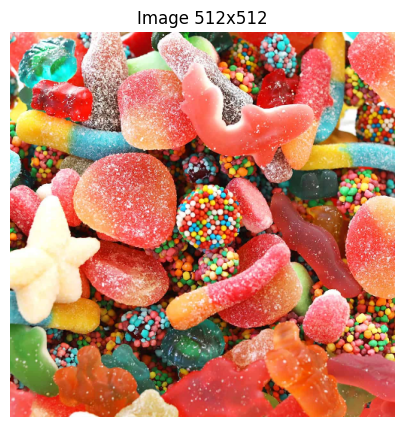

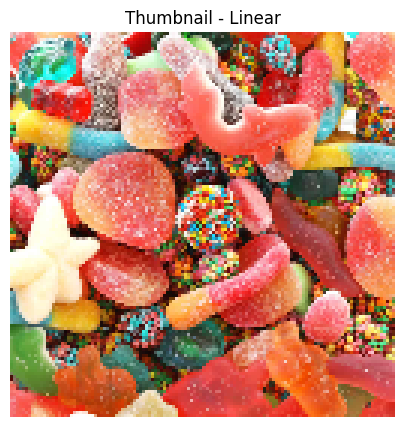

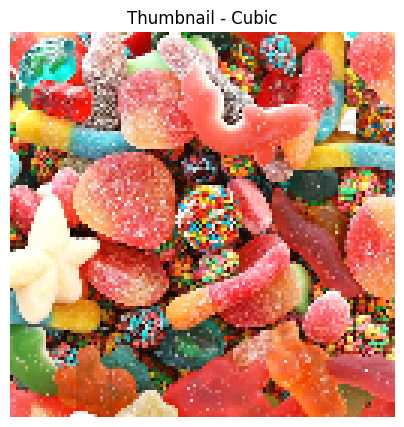

In [ ]:
img = cv2.imread("images/CANDY.jpg")

img512 = cv2.resize(img, (512,512))
thumb_linear = cv2.resize(img512, (128,128), interpolation=cv2.INTER_LINEAR)
thumb_cubic = cv2.resize(img512, (128,128), interpolation=cv2.INTER_CUBIC)

show(img512, "Image 512x512")
show(thumb_linear, "Thumbnail - Linear")
show(thumb_cubic, "Thumbnail - Cubic")

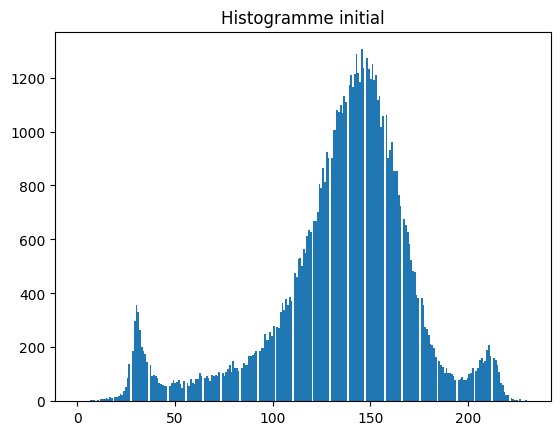

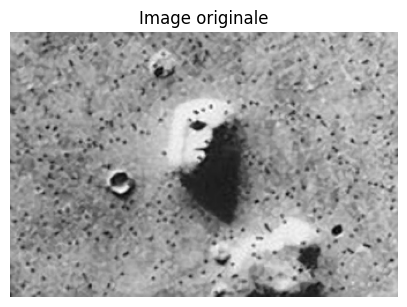

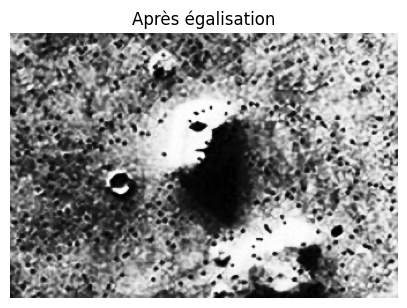

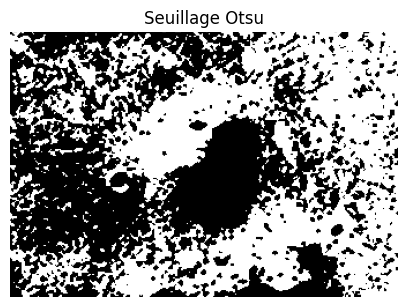

In [ ]:
img = cv2.imread("images/MARSFACE.jpg", 0)

plt.hist(img.ravel(), 256)
plt.title("Histogramme initial")
plt.show()

eq = cv2.equalizeHist(img)

_, otsu = cv2.threshold(eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show(img, "Image originale", cmap="gray")
show(eq, "Après égalisation", cmap="gray")
show(otsu, "Seuillage Otsu", cmap="gray")

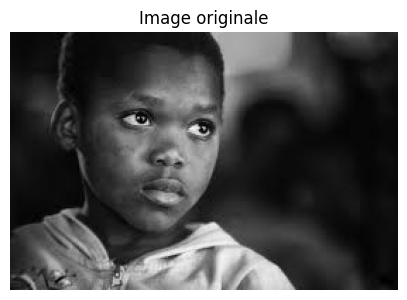

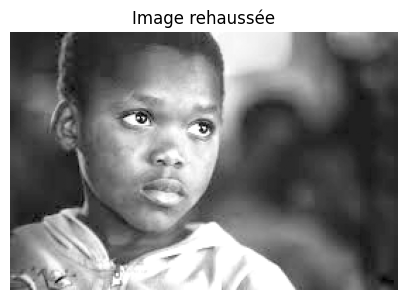

In [ ]:
img = cv2.imread("images/black.jpeg", 0)

gamma = 1.6
gamma_corr = np.array(255*(img/255)**(1/gamma), dtype='uint8')
contrast = cv2.convertScaleAbs(gamma_corr, alpha=1.2, beta=10)

show(img, "Image originale", cmap="gray")
show(contrast, "Image rehaussée", cmap="gray")